In [1]:
import cv2
import matplotlib.pyplot as plt

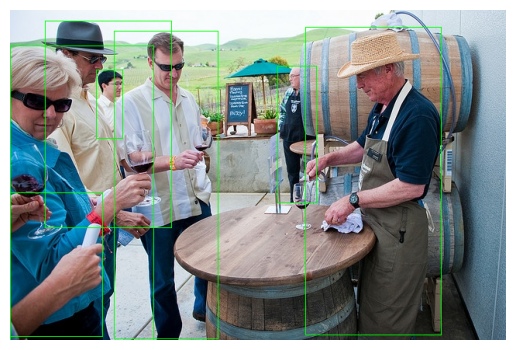

/kaggle/input/sampled-coco2017-person-dataset/Dataset_person/train/images/000000000308.jpg
Count: 7 persons


In [2]:
img_path = '/kaggle/input/sampled-coco2017-person-dataset/Dataset_person/train/images/000000000308.jpg'
img = cv2.imread(img_path) 

h, w, _ = img.shape

with open('/kaggle/input/sampled-coco2017-person-dataset/Dataset_person/train/labels/000000000308.txt', 'r') as input_file:
    lines = input_file.readlines()
    predictions = []
    for i, line in enumerate(lines):
        parts = line.strip().split()
        predictions.append(parts[1:5])

num = 0
for pt in predictions:
    num += 1
    x = float(pt[0])*w
    y = float(pt[1])*h
    width = float(pt[2])*w
    height = float(pt[3])*h
    x0 = x - width / 2
    x1 = x + width / 2
    y0 = y - height / 2
    y1 = y + height / 2
#     print(pt)
    
    start_point = (int(x0), int(y0))
    end_point = (int(x1), int(y1))
    img = cv2.rectangle(img, start_point, end_point, color=(0,255,0), thickness=1)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(img)
plt.show()
print(f"{str(img_path)}")
person = "persons" if num>1 else "person"
print(f"Count: {num} {person}")

In [3]:
!pip install ultralytics -q
import os
from ultralytics import YOLO
!wandb disabled

W&B disabled.


In [4]:
model = YOLO("yolov8s.pt")
results = model.train(data="/kaggle/input/datamodel-yolo-person-detection/DataModel/data.yaml", epochs=50, imgsz=640, amp=False)

100%|██████████| 21.5M/21.5M [00:00<00:00, 246MB/s]


Ultralytics YOLOv8.2.58 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/datamodel-yolo-person-detection/DataModel/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

100%|██████████| 755k/755k [00:00<00:00, 37.5MB/s]
2024-07-17 12:44:25,840	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-17 12:44:27,058	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /kaggle/input/sampled-coco2017-person-dataset/Dataset_person/train/labels... 5432 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5432/5432 [00:33<00:00, 163.56it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/sampled-coco2017-person-dataset/Dataset_person/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/sampled-coco2017-person-dataset/Dataset_person/validation/labels... 1072 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1072/1072 [00:07<00:00, 148.38it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/sampled-coco2017-person-dataset/Dataset_person/validation is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       7.8G      1.263      1.258      1.289         42        640: 100%|██████████| 340/340 [01:48<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.64it/s]

                   all       1072       4401      0.498      0.399       0.41      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.54G      1.549      1.547      1.485         57        640: 100%|██████████| 340/340 [01:45<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.41it/s]


                   all       1072       4401      0.553      0.446      0.463      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.72G      1.553      1.556      1.504         31        640: 100%|██████████| 340/340 [01:45<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.44it/s]


                   all       1072       4401      0.578      0.464      0.494       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.53G      1.525      1.499      1.477         55        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.45it/s]


                   all       1072       4401      0.602      0.489      0.513      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.72G      1.465      1.423      1.436         76        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.41it/s]


                   all       1072       4401      0.623      0.508      0.558      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.51G      1.435      1.375      1.426         54        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.41it/s]


                   all       1072       4401      0.646      0.522      0.578      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       7.7G      1.391      1.333      1.394         30        640: 100%|██████████| 340/340 [01:45<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.41it/s]


                   all       1072       4401      0.671       0.53      0.597      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.73G      1.369      1.297      1.376         66        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.44it/s]


                   all       1072       4401      0.669       0.52      0.598      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.69G      1.341      1.264      1.361         48        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.45it/s]


                   all       1072       4401      0.695      0.523      0.606      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.72G      1.333      1.238      1.349         62        640: 100%|██████████| 340/340 [01:45<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.42it/s]


                   all       1072       4401      0.702       0.56      0.631      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.51G      1.316      1.212      1.334         84        640: 100%|██████████| 340/340 [01:45<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.53it/s]


                   all       1072       4401      0.695       0.55      0.625      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.71G      1.297      1.181      1.318         57        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.40it/s]


                   all       1072       4401      0.716      0.572      0.652      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.52G      1.281      1.171      1.315         72        640: 100%|██████████| 340/340 [01:44<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]

                   all       1072       4401      0.716      0.567      0.644      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.71G      1.265      1.139      1.304         75        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]


                   all       1072       4401       0.71      0.579      0.654       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.74G       1.25      1.131      1.299         45        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.45it/s]


                   all       1072       4401      0.716      0.579      0.659      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.71G      1.241      1.112      1.285         58        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]

                   all       1072       4401      0.726      0.571      0.659       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.72G      1.223      1.095      1.277         31        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.43it/s]

                   all       1072       4401      0.724      0.583      0.668      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       7.7G      1.215      1.075      1.262         83        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.43it/s]

                   all       1072       4401      0.734       0.58      0.672      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       7.7G      1.203      1.068      1.263         66        640: 100%|██████████| 340/340 [01:45<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.42it/s]


                   all       1072       4401      0.738      0.596       0.68      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.54G      1.198       1.06      1.263         63        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.52it/s]

                   all       1072       4401      0.748      0.585      0.677      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.73G      1.184      1.035      1.251         73        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]

                   all       1072       4401      0.757      0.584      0.683      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.51G      1.168      1.015      1.242         45        640: 100%|██████████| 340/340 [01:45<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.41it/s]


                   all       1072       4401      0.737      0.593      0.684      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.71G      1.166      1.007      1.242         62        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.46it/s]

                   all       1072       4401      0.737      0.603      0.692      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.71G      1.157     0.9928      1.228         53        640: 100%|██████████| 340/340 [01:45<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.46it/s]

                   all       1072       4401       0.74      0.609      0.692       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       7.5G      1.144     0.9818      1.224         38        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]

                   all       1072       4401      0.733      0.616      0.701      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.71G      1.146     0.9725       1.22         29        640: 100%|██████████| 340/340 [01:45<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]

                   all       1072       4401      0.764      0.619      0.708       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.73G      1.133     0.9575      1.213         78        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.46it/s]

                   all       1072       4401      0.768      0.606        0.7      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.74G      1.122     0.9443      1.207         83        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.45it/s]

                   all       1072       4401      0.757      0.617      0.708      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.73G      1.106     0.9345      1.199         36        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]

                   all       1072       4401      0.778      0.608      0.708      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.55G      1.107     0.9316      1.198         78        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.51it/s]

                   all       1072       4401      0.776      0.609      0.709       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       7.7G      1.086     0.9067       1.19         48        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.49it/s]

                   all       1072       4401      0.775      0.608      0.712      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.72G      1.086     0.8937      1.184         81        640: 100%|██████████| 340/340 [01:45<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.49it/s]

                   all       1072       4401       0.79      0.619      0.723      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.69G      1.087     0.9006      1.177         57        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.48it/s]

                   all       1072       4401      0.792      0.617      0.724      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.72G      1.074     0.8856       1.18         64        640: 100%|██████████| 340/340 [01:44<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.41it/s]

                   all       1072       4401      0.781       0.61      0.712      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       7.7G      1.064     0.8624      1.174         51        640: 100%|██████████| 340/340 [01:44<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]

                   all       1072       4401      0.761      0.636      0.723      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       7.7G       1.06     0.8662      1.168         26        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.49it/s]

                   all       1072       4401      0.765      0.626      0.721      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.69G      1.037     0.8424      1.157         40        640: 100%|██████████| 340/340 [01:44<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.53it/s]

                   all       1072       4401      0.756      0.636      0.725      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.73G      1.037     0.8366      1.154         70        640: 100%|██████████| 340/340 [01:44<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.54it/s]

                   all       1072       4401      0.776      0.633      0.728      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.71G      1.036     0.8257      1.147         72        640: 100%|██████████| 340/340 [01:45<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]

                   all       1072       4401      0.784      0.623      0.726      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.69G      1.024      0.816      1.149         54        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.48it/s]

                   all       1072       4401      0.789       0.62      0.722      0.472


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       7.7G          1     0.7513      1.109         29        640: 100%|██████████| 340/340 [01:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.46it/s]

                   all       1072       4401      0.786      0.629      0.726      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.69G     0.9827     0.7321      1.105         16        640: 100%|██████████| 340/340 [01:44<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.49it/s]

                   all       1072       4401      0.792      0.631      0.725      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.73G     0.9753     0.7178      1.101         45        640: 100%|██████████| 340/340 [01:44<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.46it/s]

                   all       1072       4401      0.789      0.626      0.725      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.73G     0.9699     0.7088      1.092         42        640: 100%|██████████| 340/340 [01:44<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.44it/s]

                   all       1072       4401      0.778      0.635      0.725      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.73G     0.9559     0.6903      1.086         17        640: 100%|██████████| 340/340 [01:44<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.43it/s]

                   all       1072       4401        0.8      0.631       0.73      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.73G     0.9465     0.6838      1.079         34        640: 100%|██████████| 340/340 [01:44<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.41it/s]

                   all       1072       4401      0.789      0.637      0.729      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.73G     0.9338     0.6662      1.074         34        640: 100%|██████████| 340/340 [01:44<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.48it/s]

                   all       1072       4401      0.778      0.644      0.727      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.73G     0.9214      0.652      1.065         19        640: 100%|██████████| 340/340 [01:44<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.44it/s]

                   all       1072       4401       0.81      0.626      0.731      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.72G     0.9205     0.6499      1.062         47        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.45it/s]

                   all       1072       4401       0.78      0.642       0.73      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.73G     0.9176     0.6433       1.06         22        640: 100%|██████████| 340/340 [01:44<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.51it/s]

                   all       1072       4401      0.801      0.631       0.73      0.481



50 epochs completed in 1.589 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.58 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.75it/s]


                   all       1072       4401      0.809      0.626      0.731      0.481
Speed: 0.1ms preprocess, 3.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train
